In [ ]:
# !git clone https://github.com/Daniel-Tran3/CSE_151A_Project.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apartments_df = pd.read_csv("apartments_for_rent_classified_10K_utf.csv")

In [3]:
apartments_df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790.00,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425.00,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390.00",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925.00,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880.00,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [4]:
apartments_df.describe().round(2)

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.00,9993.00,10000.00,10000.00,9990.00,9990.00,1.000000e+04
mean,5.623396e+09,1.38,1.74,1486.28,945.81,37.70,-94.65,1.574891e+09
std,7.021025e+07,0.62,0.94,1076.51,655.76,5.50,15.76,3.762395e+06
min,5.508654e+09,1.00,0.00,200.00,101.00,21.32,-158.02,1.568744e+09
25%,5.509248e+09,1.00,1.00,949.00,649.00,33.68,-101.30,1.568781e+09
50%,5.668610e+09,1.00,2.00,1270.00,802.00,38.81,-93.65,1.577358e+09
75%,5.668626e+09,2.00,2.00,1695.00,1100.00,41.35,-82.21,1.577359e+09
max,5.668663e+09,8.50,9.00,52500.00,40000.00,61.59,-70.19,1.577362e+09


In [5]:
apartments_df.isna().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

[Text(0.5, 1.0, 'Missing Data')]

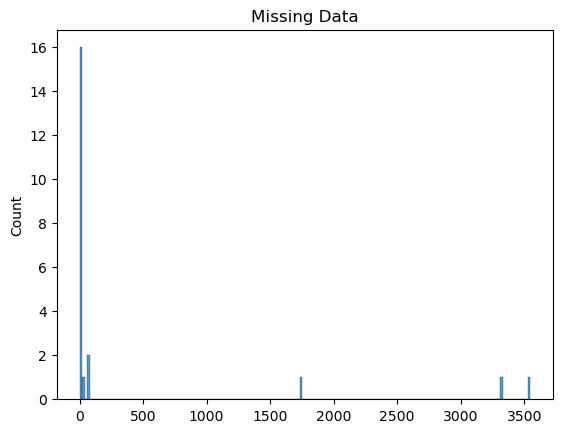

In [10]:
sns.histplot(apartments_df.isna().sum()).set(title='Missing Data')

In [11]:

# apartments_df['amenities'] = apartments_df['amenities'].fillna('')
# apartments_df['bathrooms'] = apartments_df['bathrooms'].fillna(apartments_df['bathrooms'].mean())
# apartments_df['bedrooms'] = apartments_df['bedrooms'].fillna(apartments_df['bedrooms'].mean())    
# apartments_df['pets_allowed'] = apartments_df['pets_allowed'].fillna(apartments_df['pets_allowed'].mean())
# apartments_df['address'] = apartments_df['address'].fillna(apartments_df['address'].mean())
# apartments_df['cityname'] = apartments_df['cityname'].fillna(apartments_df['cityname'].mean())
# apartments_df['state'] = apartments_df['state'].fillna(apartments_df['state'].mean())
# apartments_df['latitude'] = apartments_df['latitude'].fillna(apartments_df['cityname'].mean())

<Axes: xlabel='state', ylabel='Count'>

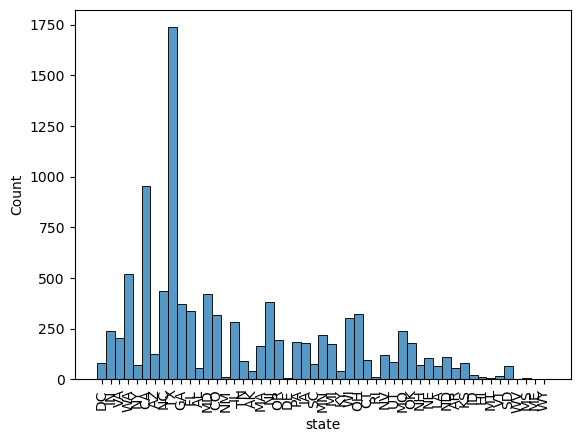

In [12]:
plt.xticks(rotation = 90)
sns.histplot(apartments_df['state'])

In [13]:
print(apartments_df.columns)
#Remove some columns from apartments_df that are too specific to be relevant for measuring purposes
measured_df = apartments_df[["amenities", "bathrooms", "bedrooms", "fee", "price", "price_type", "square_feet", "cityname", "state", "time"]]

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [14]:
measured_df.head()

,amenities,bathrooms,bedrooms,fee,price,price_type,square_feet,cityname,state,time
0,NaN,NaN,0.0,No,790,Monthly,101,Washington,DC,1577359415
1,NaN,NaN,1.0,No,425,Monthly,106,Evansville,IN,1577017063
2,NaN,1.0,0.0,No,1390,Monthly,107,Arlington,VA,1577359410
3,NaN,1.0,0.0,No,925,Monthly,116,Seattle,WA,1576667743
4,NaN,NaN,0.0,No,880,Monthly,125,Arlington,VA,1577359401


In [15]:
#Convert any prices measured in Weeks to Months by converting to price per day then price per year then price per month (roughly 4.348 multiplier)
for i in measured_df.index:
  if (measured_df['price_type'][i] == "Weekly"):
    measured_df.loc[i, 'price'] = measured_df['price'][i] / 7 * 365.25 / 12

# the there is only one apart with 'weekly' price_type. The price for 'week' is 1560. If we use the formula above, it would be really large number. Consider that as any outlier?
# There is also one record with 'Monthly|Weekely' price_type. Price 275.0, how to interpret that?

In [16]:
# measured_df['price_type'].value_counts()
# print(measured_df[measured_df['price_type'] == 'Monthly|Weekly']['price'])

for column in measured_df.columns:
    num_unique_values = measured_df[column].nunique()
    print(f"Data type of {column}: {measured_df[column].dtype} with number of unique values: {num_unique_values}")
# all value of 'fee' is 'No'

Data type of amenities: object with number of unique values: 2254
Data type of bathrooms: float64 with number of unique values: 14
Data type of bedrooms: float64 with number of unique values: 10
Data type of fee: object with number of unique values: 1
Data type of price: float64 with number of unique values: 1726
Data type of price_type: object with number of unique values: 3
Data type of square_feet: int64 with number of unique values: 1738
Data type of cityname: object with number of unique values: 1574
Data type of state: object with number of unique values: 51
Data type of time: int64 with number of unique values: 6310


In [17]:
# encode amenities and state
# no need to encode fee (all 'No'), price_type(all scaled to 'Monthly' except 'Month|Weekly'),
# cityname(too many, meaningless)
# when training, please don't fit time, it's also meaningless (6310 unique values)
from sklearn.preprocessing import OneHotEncoder
myohe = OneHotEncoder()
amenities_ohe = myohe.fit_transform(measured_df.amenities.values.reshape(-1,1)).toarray()
amenitieslist = list(myohe.categories_[0])
amenities_df = pd.DataFrame(amenities_ohe, columns = amenitieslist)
# amentities_df

myohe = OneHotEncoder()
state_ohe = myohe.fit_transform(measured_df.state.values.reshape(-1, 1)).toarray()
statelist = list(myohe.categories_[0])
state_df = pd.DataFrame(state_ohe, columns = statelist)
# state_df

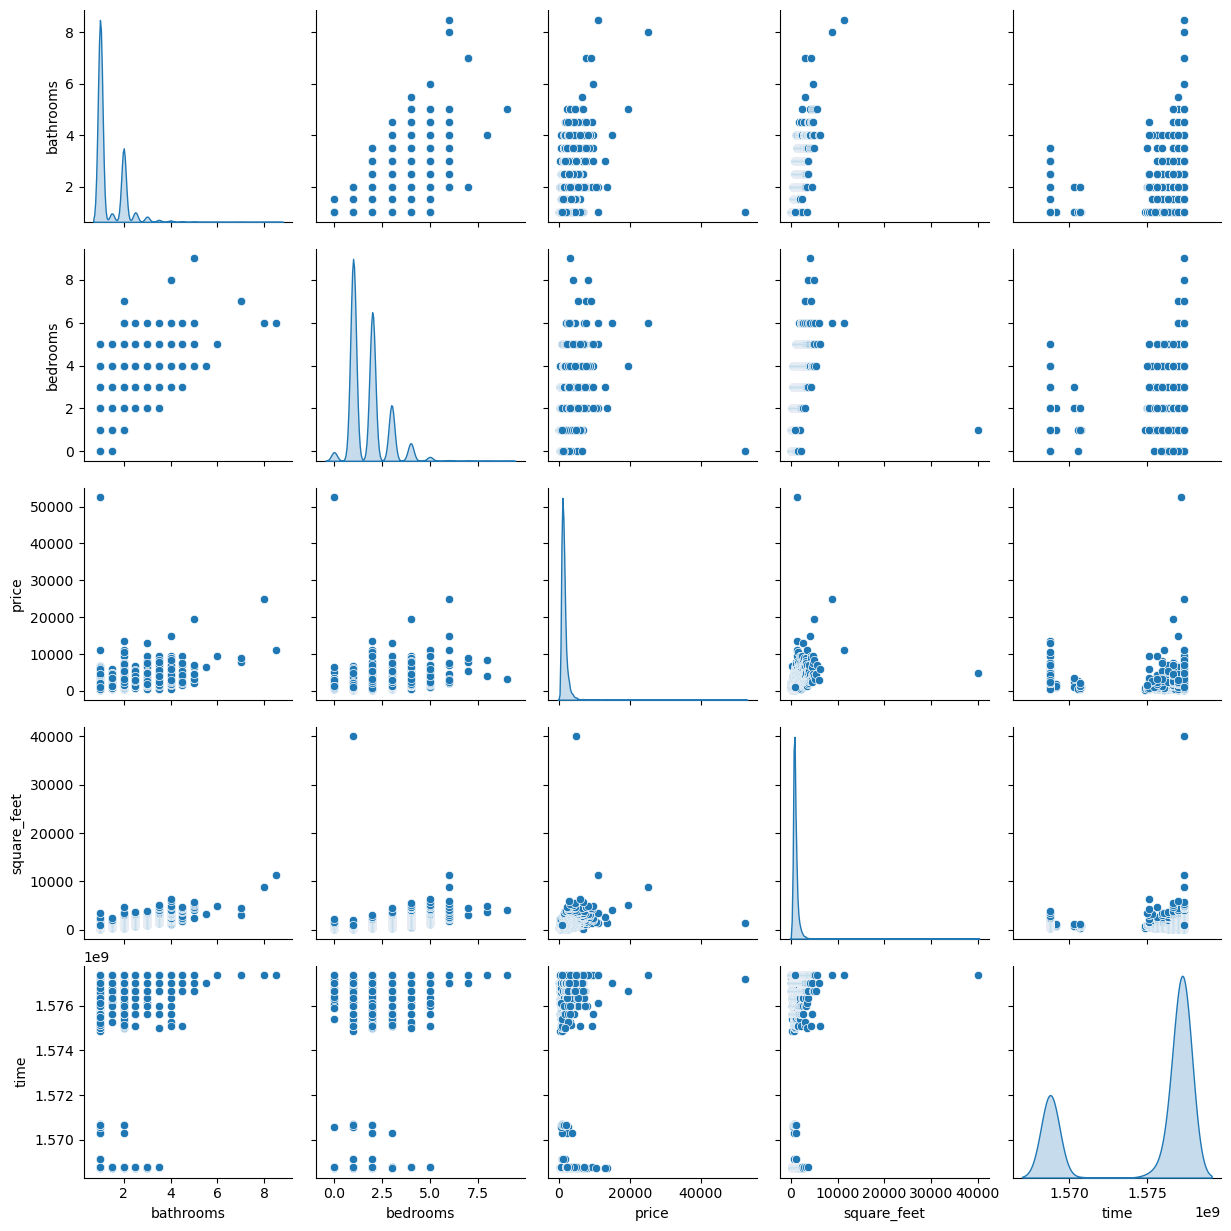

In [18]:
#Seem to be some outliers in the data that make some of them clumped up like price vs square feet
sns.pairplot(measured_df, diag_kind = "kde")

C:\Users\Aleck\AppData\Local\Temp\ipykernel_46728\2144822412.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(measured_df.corr(), vmin=-1, vmax=1, center=0, annot=True)


<Axes: >

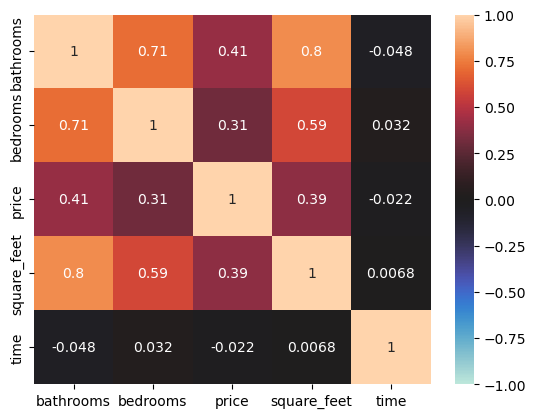

In [19]:
sns.heatmap(measured_df.corr(), vmin=-1, vmax=1, center=0, annot=True)